In [65]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import calendar
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
train_data_path=r"data\\train.csv"
test_data_path=r"data\\test.csv"

In [34]:
df_train=pd.read_csv(train_data_path)
df_test=pd.read_csv(test_data_path)

In [35]:
df=pd.concat([df_train,df_test])
df.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [37]:
pd.set_option('display.max_rows', None)
null_percent=df.isnull().sum()/df.shape[0]*100
null_percent


Id                0.000000
MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType       60.500171
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
B

In [38]:
'''
'Fence'
'PoolQC'
'MiscFeature'
'Alley'

Has most no of Null Values 
'''

"\n'Fence'\n'PoolQC'\n'MiscFeature'\n'Alley'\n\nHas most no of Null Values \n"

In [39]:
int_features=df.select_dtypes(include=['int64']).columns
print('integer features: ',int_features.tolist())
print('total no of integer features: ',int_features.shape[0])

float_features=df.select_dtypes(include=['float64']).columns
print('\nfloat features: ',float_features.tolist())
print('total no of integer features: ',float_features.shape[0])

cat_features=df.select_dtypes(include=['object']).columns
print('\ncategorical features: ',cat_features.tolist())
print('total no of integer features: ',cat_features.shape[0])

integer features:  ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
total no of integer features:  26

float features:  ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']
total no of integer features:  12

categorical features:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', '

In [40]:
df = df.drop(columns=['Id'])

In [41]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='MSZoning'>

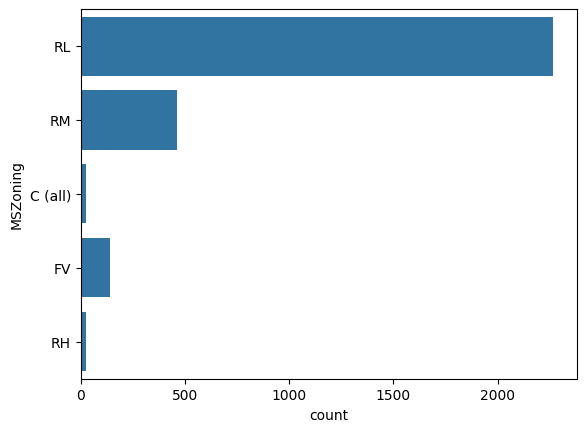

In [42]:
print(df['MSZoning'].value_counts())
sns.countplot(df['MSZoning'])

In [43]:
mszoning_mode=df['MSZoning'].mode()[0]  # Since MSZoning is a categorical feature we will use mode.
df['MSZoning'].replace(np.nan, mszoning_mode, inplace=True)
# df['MSZoning'].isnull().sum()

Alley='NA'
df['Alley'].replace(np.nan, Alley, inplace=True)
# df['Alley'].isnull().sum()

# sns.displot(df['LotFrontage']) #--> its a skew plot hence use median
LotFrontage=df['LotFrontage'].median()
df['LotFrontage'].replace(np.nan, LotFrontage, inplace=True)
df['LotFrontage'].isnull().sum()

# df['Utilities'].value_counts()
Utilities='AllPub'
df['Utilities'].replace(np.nan, Utilities, inplace=True)
df['Utilities'].isnull().sum()

# df['Exterior1st'].value_counts()
Exterior1st=df['Exterior1st'].mode()[0]
df['Exterior1st'].replace(np.nan, Exterior1st, inplace=True)
df['Exterior1st'].isnull().sum()

# df['Exterior2nd'].value_counts()
Exterior2nd=df['Exterior2nd'].mode()[0]
df['Exterior2nd'].replace(np.nan, Exterior2nd, inplace=True)
df['Exterior2nd'].isnull().sum()

# df['MasVnrType'].value_counts()
MasVnrType=df['MasVnrType'].mode()[0]
df['MasVnrType'].replace(np.nan, MasVnrType, inplace=True)
df['MasVnrType'].isnull().sum()

# df['MasVnrArea'].value_counts()
# sns.displot(df['MasVnrArea'])
MasVnrArea=0
df['MasVnrArea'].replace(np.nan, MasVnrArea, inplace=True)
df['MasVnrArea'].isnull().sum()

# sns.displot(df['BsmtQual'])
BsmtQual=df['BsmtQual'].mode()[0]  # Since MSZoning is a categorical feature we will use mode.
df['BsmtQual'].replace(np.nan, BsmtQual, inplace=True)
df['BsmtQual'].isnull().sum()

# sns.displot(df['BsmtExposure'])
BsmtExposure=df['BsmtExposure'].mode()[0]  # Since MSZoning is a categorical feature we will use mode.
df['BsmtExposure'].replace(np.nan, BsmtExposure , inplace=True)
df['BsmtExposure'].isnull().sum()

# sns.displot(df['BsmtFinType1'])
BsmtFinType1=df['BsmtFinType1'].mode()[0]  # Since MSZoning is a categorical feature we will use mode.
df['BsmtFinType1'].replace(np.nan, BsmtFinType1 , inplace=True)
df['BsmtFinType1'].isnull().sum()

# sns.displot(df['BsmtFinSF1'])
BsmtFinSF1=0  
df['BsmtFinSF1'].replace(np.nan, BsmtFinSF1 , inplace=True)
df['BsmtFinSF1'].isnull().sum()

# sns.displot(df['BsmtFinType2'])
BsmtFinType2=df['BsmtFinType2'].mode()[0]  
df['BsmtFinType2'].replace(np.nan, BsmtFinType2 , inplace=True)
df['BsmtFinType2'].isnull().sum()

# sns.displot(df['BsmtFinSF2'])
BsmtFinSF2=0  
df['BsmtFinSF2'].replace(np.nan, BsmtFinSF2 , inplace=True)
df['BsmtFinSF2'].isnull().sum()

# sns.displot(df['BsmtUnfSF'])
BsmtUnfSF=df['BsmtFinSF2'].mean()
df['BsmtUnfSF'].replace(np.nan, BsmtUnfSF , inplace=True)
df['BsmtUnfSF'].isnull().sum()

# sns.displot(df['TotalBsmtSF'])
TotalBsmtSF =df['TotalBsmtSF'].mean()
df['TotalBsmtSF'].replace(np.nan, TotalBsmtSF  , inplace=True)
df['TotalBsmtSF'].isnull().sum()

# sns.displot(df['Electrical'])
Electrical =df['Electrical'].mode()[0]
df['Electrical'].replace(np.nan, Electrical, inplace=True)
df['Electrical'].isnull().sum()

# sns.displot(df['BsmtFullBath'])
BsmtFullBath=0
df['BsmtFullBath'].replace(np.nan, BsmtFullBath, inplace=True)
df['BsmtFullBath'].isnull().sum()

# sns.displot(df['BsmtHalfBath'])
BsmtHalfBath=0
df['BsmtHalfBath'].replace(np.nan, BsmtHalfBath, inplace=True)
df['BsmtHalfBath'].isnull().sum()

# sns.displot(df['KitchenQual'])
KitchenQual=df['KitchenQual'].mode()[0]
df['KitchenQual'].replace(np.nan, KitchenQual, inplace=True)
df['KitchenQual'].isnull().sum()

# sns.displot(df['Functional'])
Functional=df['Functional'].mode()[0]
df['Functional'].replace(np.nan, Functional, inplace=True)
df['Functional'].isnull().sum()

fireplaceQu="NA"
df["FireplaceQu"].replace(np.nan, fireplaceQu, inplace=True)
df["FireplaceQu"].isnull().sum()


0

In [44]:
Categories=['GarageType',
'GarageFinish',   
'GarageQual',   
'GarageCond',   
'PoolQC',  
'Fence',   
'MiscFeature']

None_value="NA"
for cat in Categories:
    df[cat].replace(np.nan, None_value, inplace=True)
    print(cat,df[cat].isnull().sum())

GarageType 0
GarageFinish 0
GarageQual 0
GarageCond 0
PoolQC 0
Fence 0
MiscFeature 0


In [45]:
Garage=["GarageYrBlt",
"GarageCars", 
"GarageArea"]
Value=0
for feat in Garage:
    df[feat].replace(np.nan, Value, inplace=True)
    print(feat,df[feat].isnull().sum())

GarageYrBlt 0
GarageCars 0
GarageArea 0


In [46]:
# sns.displot(df['SaleType'])
SaleType=df['SaleType'].mode()[0]
df['SaleType'].replace(np.nan, SaleType, inplace=True)
df['SaleType'].isnull().sum()

0

In [47]:
# df.to_csv('output.csv')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

### Converting the numerical values to categorical

In [49]:
catg=["YearRemodAdd","YearBuilt","MSSubClass","GarageYrBlt","MoSold","YrSold"]
for cat in catg:
    print(cat,df[cat].dtype)

df['MoSold']=df['MoSold'].apply(lambda x:calendar.month_abbr[x])

for cat in catg:
    df[cat]=df[cat].astype(str)

for cat in catg:
    print('\n',cat,df[cat].dtype)

YearRemodAdd int64
YearBuilt int64
MSSubClass int64
GarageYrBlt float64
MoSold int64
YrSold int64

 YearRemodAdd object

 YearBuilt object

 MSSubClass object

 GarageYrBlt object

 MoSold object

 YrSold object


### Converting from categorical to numerical ordinal encoding

In [50]:
df['ExterQual'].value_counts()

ExterQual
TA    1798
Gd     979
Ex     107
Fa      35
Name: count, dtype: int64

In [51]:
'''['ExterQual',
'ExterCond',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2',
'HeatingQC',
'KitchenQual',
'FireplaceQqu',
'GarageQual',
'GarageCond',
'PoolQC',
'Functional',
'GarageFinish',
'PavedDrive',
'Utilities'
]'''

"['ExterQual',\n'ExterCond',\n'BsmtQual',\n'BsmtCond',\n'BsmtExposure',\n'BsmtFinType1',\n'BsmtFinType2',\n'HeatingQC',\n'KitchenQual',\n'FireplaceQqu',\n'GarageQual',\n'GarageCond',\n'PoolQC',\n'Functional',\n'GarageFinish',\n'PavedDrive',\n'Utilities'\n]"

### Ordinal Encoding

In [52]:
df['ExterQual']=df['ExterQual'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','Ex'], ordered=True)).cat.codes
df['ExterCond']=df['ExterCond'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','Ex'], ordered=True)).cat.codes
df['BsmtQual']=df['BsmtQual'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'], ordered=True)).cat.codes
df['BsmtCond']=df['BsmtCond'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'], ordered=True)).cat.codes
df['BsmtExposure']=df['BsmtExposure'].astype(CategoricalDtype(categories=['NA','No','Mn','Av','Gd'], ordered=True)).cat.codes
df['BsmtFinType1']=df['BsmtFinType1'].astype(CategoricalDtype(categories=['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'], ordered=True)).cat.codes
df['BsmtFinType2']=df['BsmtFinType2'].astype(CategoricalDtype(categories=['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'], ordered=True)).cat.codes
df['HeatingQC']=df['HeatingQC'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','Ex'], ordered=True)).cat.codes
df['KitchenQual']=df['KitchenQual'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','Ex'], ordered=True)).cat.codes
df['FireplaceQu']=df['FireplaceQu'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'], ordered=True)).cat.codes
df['GarageQual']=df['GarageQual'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'], ordered=True)).cat.codes
df['GarageCond']=df['GarageCond'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'], ordered=True)).cat.codes
df['PoolQC']=df['PoolQC'].astype(CategoricalDtype(categories=['NA','Fa','TA','Gd','Ex'], ordered=True)).cat.codes
df['Functional']=df['Functional'].astype(CategoricalDtype(categories=['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'], ordered=True)).cat.codes
df['GarageFinish']=df['GarageFinish'].astype(CategoricalDtype(categories=['NA','Unf','RFn','Fin'], ordered=True)).cat.codes
df['PavedDrive']=df['PavedDrive'].astype(CategoricalDtype(categories=['N','P','Y'], ordered=True)).cat.codes
df['Utilities']=df['Utilities'].astype(CategoricalDtype(categories=['ELO','NoSeWa','NoSewr','AllPub'], ordered=True)).cat.codes


### One Hot Encoding

In [53]:
object_features=df.select_dtypes(include='object').columns.tolist()
print(object_features,len(object_features))

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageYrBlt', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'] 32


In [54]:
df=pd.get_dummies(df,columns=object_features, prefix=object_features,drop_first=False, )


In [55]:
# df.to_csv('data\preprocessed_data.csv')

In [56]:
'''Train Test Split'''

len_train=df_train.shape[0]
X_train=df[:len_train].drop("SalePrice",axis=1)
y_train=df['SalePrice'][:len_train]
X_test=df[len_train:].drop("SalePrice", axis=1)

In [57]:
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)

In [58]:
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [64]:
#! Formula=(value-mean)/standard deviation
# sc.get_params()
# sc.get_feature_names_out()
# sc.var_
# sc.mean_